<a href="https://colab.research.google.com/github/gabrielfernandorey/NLP/blob/main/Tecnicas-avanzadas/ITBA_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTopic

In [1]:
!git clone https://github.com/deeplearning-itba/dl_topics.git

Cloning into 'dl_topics'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 25 (delta 9), reused 22 (delta 6), pack-reused 0
Receiving objects: 100% (25/25), 9.88 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [10]:
from bertopic import BERTopic
import pandas as pd
from tqdm import tqdm
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
topic_model = BERTopic(
    language='spanish'
    # calculate_probabilities=True
)

In [3]:
df = pd.read_parquet('data/df_joined_2024-04-01 00_00_00.parquet')

In [4]:
data = list(df['in__title'])

In [5]:
topics, probs = topic_model.fit_transform(data)

In [7]:
# Cantidad de documentos
len(topics)

3104

### Ver documentos de un topico

In [15]:
# Definir la función de estilo
def color_rows(row, label, value):
    if row[label] >= value:
        return ['color: cyan'] * len(row)
    else:
        return [''] * len(row)
    
def noticias_por_topico(topic):
    
    # Agrupamos documentos por topico
    T = topic_model.get_document_info(data)
    docs_per_topics = T.groupby(["Topic"]).apply(lambda x: x.index).to_dict()

    # Obtener los IDs de los documentos y sus probabilidades 
    docs_ids = []
    docs_topic = []
    doc_probs_x_topic = []
    for doc_ID in tqdm(docs_per_topics[topic]):
        docs_ids.append(df.index[doc_ID])
        doc_probs_x_topic.append(probs[doc_ID])

    # Calcular la media, el desvío estándar
    mean = np.mean(doc_probs_x_topic)
    std_dev = np.std(doc_probs_x_topic)
    threshold = mean - std_dev


    docs_topic.append([docs_ids, title, prob_doc, ent])

    df_view = pd.DataFrame(docs_topic, columns = ['indice','titulo','prob','entidades']).sort_values('prob', ascending=False)
    df_view.style.apply(lambda row: color_rows(row, 'prob', threshold), axis=1)

    return doc_probs_x_topic



In [16]:
df_view = docs_topic(10)
df_view

100%|██████████| 41/41 [00:00<?, ?it/s]


[1.0,
 0.6734825696401955,
 1.0,
 1.0,
 0.8906324485242251,
 0.2221326389526405,
 0.2221326389526405,
 0.29230309076291494,
 1.0,
 0.2103975182680283,
 0.18671345875333625,
 0.21107231363243126,
 0.2660683111355817,
 0.20045283577839745,
 1.0,
 1.0,
 0.20969395214637215,
 1.0,
 0.18959326890481623,
 0.2221326389526405,
 0.2103975182680283,
 1.0,
 0.17526770744611794,
 0.189337754281446,
 0.490641028320505,
 0.4956486734993301,
 0.18345787787966458,
 0.2221326389526405,
 0.2137824070985365,
 0.1764735767461268,
 0.2116419254722219,
 1.0,
 0.20553663766170913,
 0.9418868567778317,
 0.1681832766522266,
 1.0,
 0.6559319043852629,
 0.2221326389526405,
 0.20049743309090529,
 1.0,
 0.2005949455200413]

In [8]:
# Devuelve el topicos encontrado para cada documento, no es necesario definir la cantida de topicos previamente,
# sino que lo realiza automatico.
# -1 es un topico "basura" o de descarte, basicamente el topico encontrado de ese documento esta muy alejado de cualquier cluster de topicos que se hayan formado.
topics[:20]

[26, 3, 10, -1, 0, -1, -1, -1, 5, 1, -1, -1, 31, -1, 77, -1, 52, 61, 13, -1]

### Visualizar

In [20]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1078,-1_el_de_la_en,"[el, de, la, en, los, por, que, malvinas, su, ...",[La emoción de Victoria Villarruel en el acto ...
1,0,85,0_argentina_cadena_argentinos_notas,"[argentina, cadena, argentinos, notas, vamos, ...",[Florencia Peña vuelve a Carlos Paz con el fur...
2,1,66,1_dengue_casos_180_brote,"[dengue, casos, 180, brote, criticó, catamarca...",[Dengue: suman más de 180.000 casos en el país...
3,2,64,2_milei_javier_gobernadores_contra,"[milei, javier, gobernadores, contra, tensión,...",[Ajuste: no cede la tensión entre Milei y los ...
4,3,59,3_favor_pbi_cupón_justicia,"[favor, pbi, cupón, justicia, falló, argentina...",[La justicia de Estados Unidos falló a favor d...
...,...,...,...,...,...
76,75,11,75_inter_empoli_lautaro_serie,"[inter, empoli, lautaro, serie, martínez, ital...",[El Inter de Lautaro Martínez sigue firme en l...
77,76,11,76_agro_marzo_61_dólares,"[agro, marzo, 61, dólares, millones, 501, ingr...",[El ingreso de divisas por exportaciones del a...
78,77,11,77_cine_víctor_vieyra_simpatizante,"[cine, víctor, vieyra, simpatizante, amc, apar...","[""Lucky Hank"": un tipo peleado con la vida | P..."
79,78,10,78_mdz_online_tv_fantino,"[mdz, online, tv, fantino, encendieron, paneli...",[Tensión en América TV: Marcelo Tinelli habló ...


Puedo visualizar en un dataframe cual es la probabilidad de que el documento pertenezca al topico.

In [14]:
df_top_probs = pd.DataFrame([{'prob': p, 'topic': t} for t, p in zip(topics, probs)])
df_top_probs

,prob,topic
0,0.000000,-1
1,0.983845,3
2,0.919885,43
3,0.000000,-1
4,0.237221,0
...,...,...
3099,0.839717,12
3100,0.792613,2
3101,1.000000,41
3102,0.000000,-1


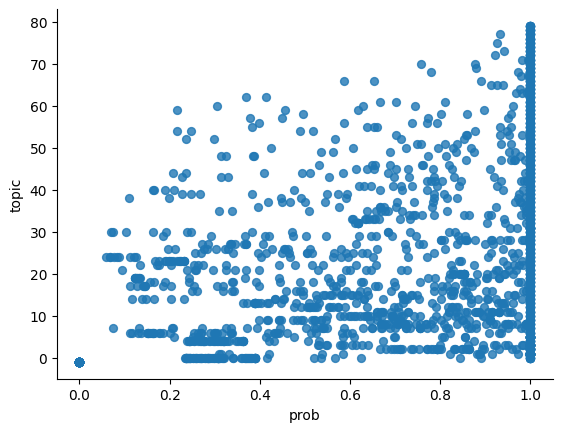

In [15]:
# @title prob vs topic

from matplotlib import pyplot as plt
df_top_probs.plot(kind='scatter', x='prob', y='topic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

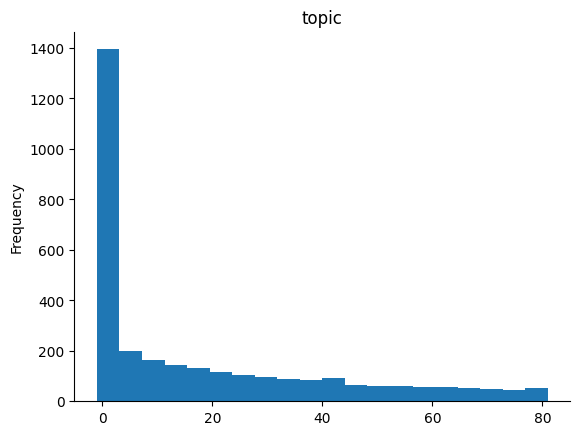

In [ ]:
# @title topic

from matplotlib import pyplot as plt
df_top_probs['topic'].plot(kind='hist', bins=20, title='topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

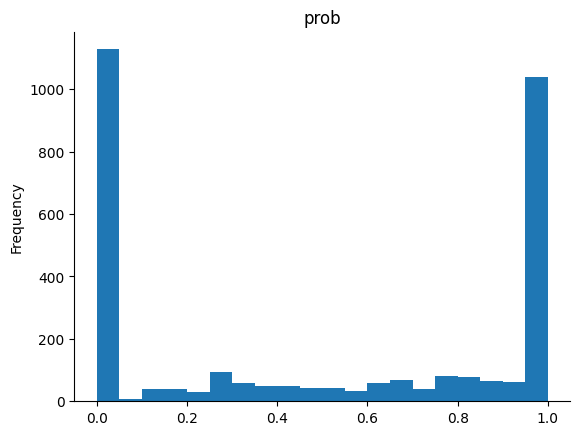

In [ ]:
# @title prob

from matplotlib import pyplot as plt
df_top_probs['prob'].plot(kind='hist', bins=20, title='prob')
plt.gca().spines[['top', 'right',]].set_visible(False)

Pero puedo obtener una distribucion de probabilidades de topicos para cada documento, y para eso debo configurar "calculate_probabilities=True"

In [ ]:
topic_model = BERTopic(
    language='spanish',
    calculate_probabilities=True
)

In [ ]:
topics_2, probs_2 = topic_model.fit_transform(data)

In [ ]:
doc_idx = 2
data[doc_idx]

'Día de los veteranos de Malvinas: el impacto y las secuelas del trauma psíquico en los excombatientes'

In [ ]:
# Observo los indices de las probabilidades de los topicos, ordenado de mayor a menor
doc_topic = probs_2[doc_idx].argsort()[::-1]
print(doc_topic)

[43 66 38 19 68 22 15 13  8 37 70 52 55  9 33 28 54 79 75 61 24 10 44 46
 56  0 63 73 14 69 42 78 25  3  4  5 34 77 59 57 40 20 67 23 47 49 72 18
 35 45 62 58 36 21 48 17 27 51 12 74  2 26 41 32  6 60 11 76 30 50 39 29
 64 53  7 31 65  1 71 16]


In [ ]:
# Obtengo las 5 primeras probabilidades de topicos para este documento
doc_topic_probs = probs_2[doc_idx][doc_topic[:5]]
print(doc_topic_probs)

[1.00000000e+000 6.73628775e-307 3.75325172e-307 3.40684646e-307
 3.25712321e-307]


In [ ]:
from collections import Counter

In [ ]:
total_topics = len(topic_model.get_topics())
total_topics

81

In [ ]:
Counter(topics)

Counter({54: 15,
         5: 51,
         17: 33,
         -1: 1128,
         0: 80,
         9: 42,
         4: 52,
         1: 69,
         30: 24,
         68: 12,
         8: 43,
         56: 15,
         12: 37,
         11: 38,
         39: 21,
         59: 14,
         74: 11,
         67: 13,
         24: 28,
         35: 22,
         72: 11,
         66: 13,
         15: 34,
         21: 29,
         10: 39,
         43: 18,
         33: 22,
         37: 21,
         71: 12,
         75: 11,
         69: 12,
         64: 14,
         14: 35,
         38: 21,
         6: 48,
         45: 17,
         2: 66,
         79: 10,
         36: 21,
         13: 36,
         80: 10,
         46: 17,
         42: 18,
         63: 14,
         7: 48,
         44: 18,
         47: 16,
         18: 32,
         77: 11,
         26: 26,
         28: 25,
         41: 19,
         25: 27,
         34: 22,
         61: 14,
         22: 28,
         78: 11,
         19: 32,
         23: 28,
    

Es posible de generar topicos padre y topicos hijos que dependen de el.

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(data)
hierarchical_topics

100%|██████████| 79/79 [00:00<00:00, 127.14it/s]


,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
78,158,de_la_en_el_que,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",115,vs_copa_tyc_sports_tv,157,de_el_en_la_un,1.486009
77,157,de_el_en_la_un,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",156,de_en_el_la_del,84,hermano_gran_furia_catalina_virginia,1.401575
76,156,de_en_el_la_del,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",155,un_la_de_en_que,153,abril_hoy_cuánto_lunes_los,1.345553
75,155,un_la_de_en_que,"[0, 1, 2, 4, 6, 9, 10, 14, 16, 18, 21, 22, 23,...",152,un_de_la_en_que,154,dengue_domínguez_esposa_emilio_golfista,1.291363
74,154,dengue_domínguez_esposa_emilio_golfista,"[1, 16, 42, 69, 71]",108,dengue_domínguez_esposa_emilio_golfista,80,arma_guardia_quitó_mujer_chile,1.282923
...,...,...,...,...,...,...,...,...
4,84,hermano_gran_furia_catalina_virginia,"[13, 44, 54]",82,hermano_gran_catalina_furia_2023,54,virginia_hermano_furia_gran_demo,0.705377
3,83,copa_liga_libertadores_sports_tyc,"[20, 41]",20,copa_liga_argentinos_libertadores_sudamericana,41,copa_tyc_sports_liga_2024,0.634545
2,82,hermano_gran_catalina_furia_2023,"[13, 44]",44,catalina_hermano_furia_gran_comentario,13,hermano_gran_gala_joel_eliminado,0.615156
1,81,domínguez_esposa_emilio_golfista_murió,"[16, 71]",16,esposa_domínguez_emilio_golfista_murió,71,mota_victoria_claverie_era_quién,0.559405


In [ ]:
topic_model.get_representative_docs(22)

['Denunció a sus vecinos por hacer un asado en Semana Santa',
 'El mensaje del Gobierno por Semana Santa: "El que cree en mí, aunque esté muerto, vivirá"',
 '"Yo soy la resurrección y la vida; el que cree en mi, aunque esté muerto, vivirá", el mensaje del gobierno por la Pascua. – frente a Cano']

In [ ]:
topic_model.embedding_model.embed('Hola que tal').shape

(384,)

In [ ]:
topic_model.c_tf_idf_

<81x7519 sparse matrix of type '<class 'numpy.float64'>'
	with 15999 stored elements in Compressed Sparse Row format>

In [ ]:
topic_model.language

'spanish'

In [ ]:
topic_model.get_topic_freq(2)

60

In [ ]:
topic_model.get_topic_info(0)

,Topic,Count,Name,Representation,Representative_Docs
0,0,74,0_milei_javier_gobernadores_contra,"[milei, javier, gobernadores, contra, error, c...",[Javier Milei suma tensión con los gobernadore...


#### Buscador de documentos de acuerdo al topico del texto ingresado

In [ ]:
new_docs_topics, new_docs_probs = topic_model.transform(
    [
        'Novedades en la guerra de Ucrania y Rusia',
        'Echaron a participante de Gran Hermano'
    ]
)

In [ ]:
new_docs_topics

[40, 13]

In [ ]:
topic_model.get_representative_docs(40)

['Una investigación periodística reveló que militares rusos están detrás del "Síndrome de La Habana"',
 'El síndrome de La Habana sería ruso | Una investigación de medios de varios países sugiere que los ataques a oficinas de EE.UU. en Cuba los hizo Rusia',
 'Una investigación periodística culpó a Rusia del "síndrome de La Habana"']

In [ ]:
topic_model.get_representative_docs(13)

['Gala de eliminación en Gran Hermano: a qué hora y cómo ver en vivo',
 'Gala de eliminación en Gran Hermano',
 'Gran Hermano 2023: cómo ver en vivo y por celular la gala de eliminación']

In [ ]:
sorted_probs = new_docs_probs.argsort(axis=1)
sorted_probs

array([[ 0, 57, 56, 55, 54, 53, 52, 51, 58, 50, 48, 47, 46, 45, 44, 43,
        42, 49, 41, 59, 61, 77, 76, 75, 74, 73, 72, 71, 60, 70, 68, 67,
        66, 65, 64, 63, 62, 69, 78, 39, 19, 16, 15, 14, 13, 12, 11, 10,
        17,  9,  7,  6,  5,  4,  3,  2,  1,  8, 18, 79, 20, 37, 36, 35,
        34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 38, 40],
       [16, 71,  1, 65,  6, 64, 40, 31, 60, 29, 50, 28,  7,  2, 11, 12,
        76, 32, 39, 21, 45, 17,  3, 53, 49, 51, 59, 23, 26, 42, 62, 77,
        69, 57, 72, 30, 67, 56, 46, 41, 18, 47, 35, 74,  4, 58, 20, 27,
        48, 73, 36, 10, 34, 14, 78,  0, 61, 24, 70, 52, 15, 37,  8, 25,
         5, 38, 43, 63, 19,  9, 68, 66, 75, 33, 79, 55, 44, 22, 54, 13]])

In [ ]:
idx = 1
new_docs_probs[idx][sorted_probs[idx]][::-1]

array([0.16358826, 0.01569947, 0.01336354, 0.01270631, 0.01196919,
       0.01189478, 0.00977998, 0.00900925, 0.00897733, 0.0087449 ,
       0.00848185, 0.00823552, 0.00764209, 0.00761526, 0.00760818,
       0.007359  , 0.0071635 , 0.00652042, 0.00643697, 0.00621848,
       0.00611322, 0.00609175, 0.00529775, 0.00525686, 0.00511033,
       0.005005  , 0.00496207, 0.00464935, 0.00462931, 0.00459207,
       0.00456965, 0.00450655, 0.00449637, 0.00449439, 0.00439574,
       0.00439352, 0.00439112, 0.00437455, 0.0043628 , 0.00432617,
       0.00431561, 0.00426441, 0.00419044, 0.00418209, 0.00416422,
       0.00407666, 0.0040747 , 0.00405869, 0.00398667, 0.00393538,
       0.00391823, 0.0038913 , 0.00384907, 0.00383475, 0.00381699,
       0.00376726, 0.00374008, 0.00372366, 0.00366157, 0.00361581,
       0.00356566, 0.00347759, 0.00342398, 0.00341999, 0.00341884,
       0.00338084, 0.0033647 , 0.00309473, 0.00281962, 0.0027518 ,
       0.00269143, 0.00236873, 0.0023402 , 0.00232939, 0.00225

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_documents(list(df['in__title']))

In [ ]:
topic_model.visualize_term_rank([0, 1, 2, 3])